# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [3]:
df['price_usd'].mean()

6639.971021255613

In [4]:
df['price_usd'].median()

4800.0

<Axes: ylabel='Frequency'>

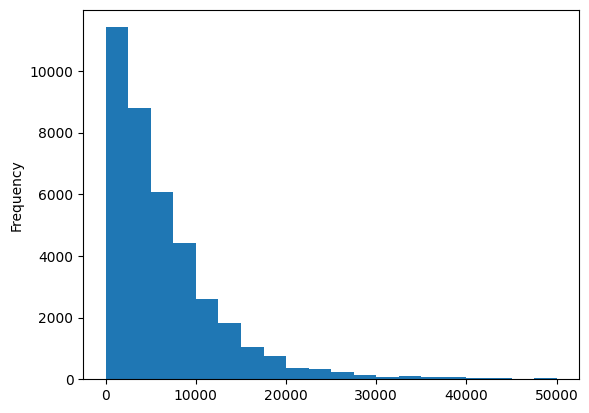

In [5]:
df['price_usd'].plot.hist(bins=20)

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

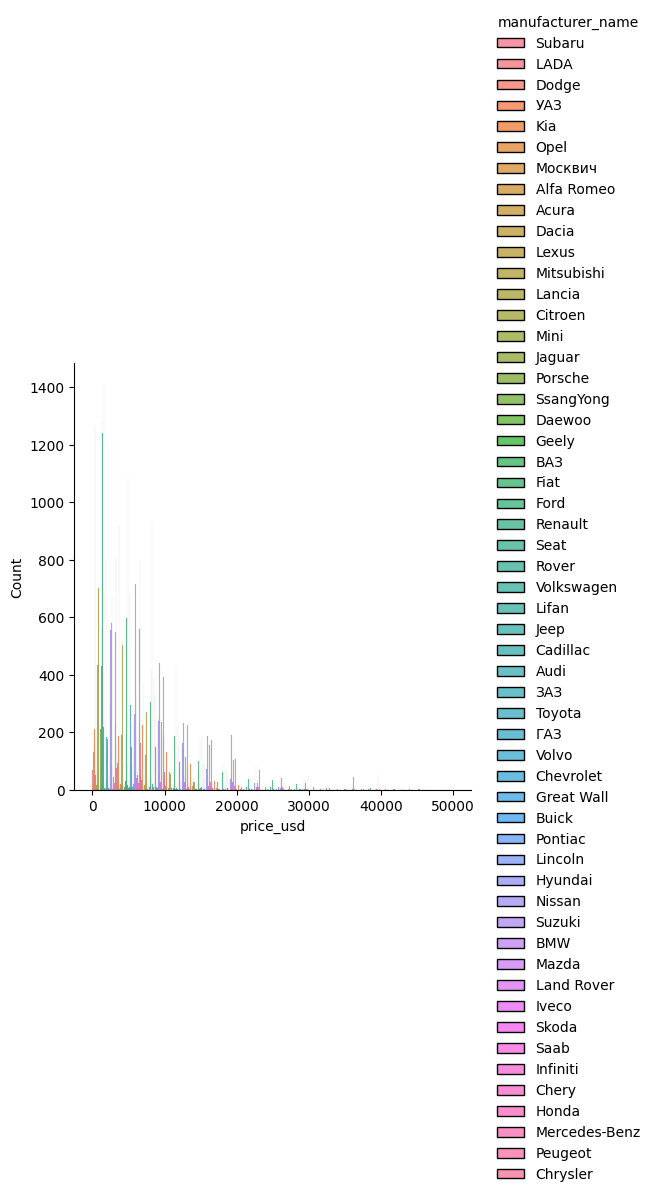

In [6]:
import seaborn as sns

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name',multiple='dodge', bins=15)

<Axes: xlabel='price_usd', ylabel='Density'>

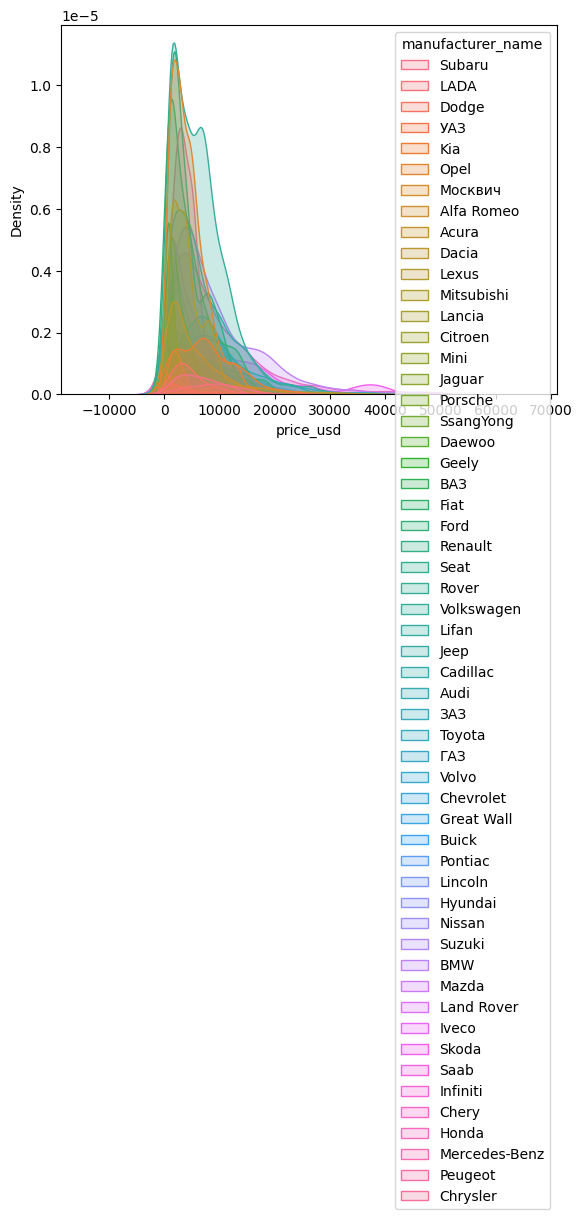

In [9]:
sns.kdeplot(data=df, x = 'price_usd', hue = 'manufacturer_name',fill=True)

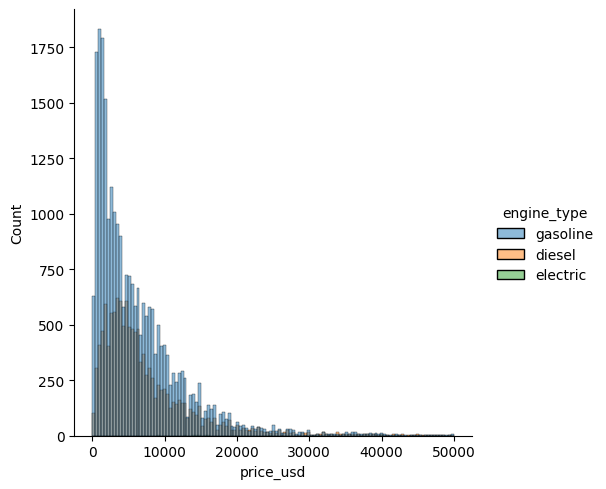

In [8]:
sns.displot(df, x="price_usd", hue="engine_type")

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

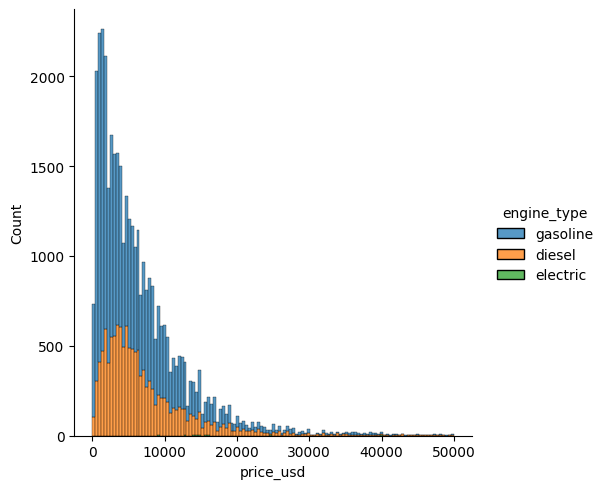

In [9]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [10]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



<Axes: xlabel='price_usd', ylabel='Count'>

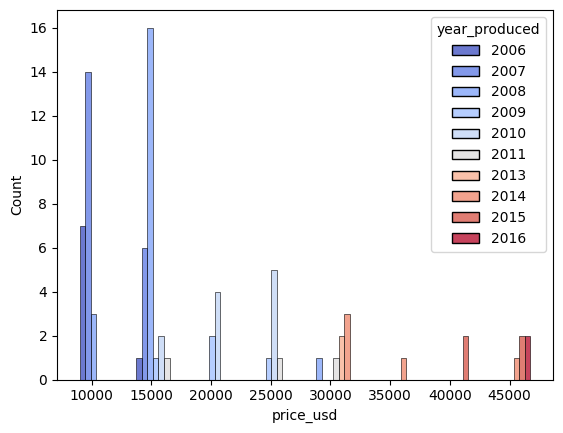

In [11]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced', multiple='dodge',palette='coolwarm')

In [12]:
df.head()


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


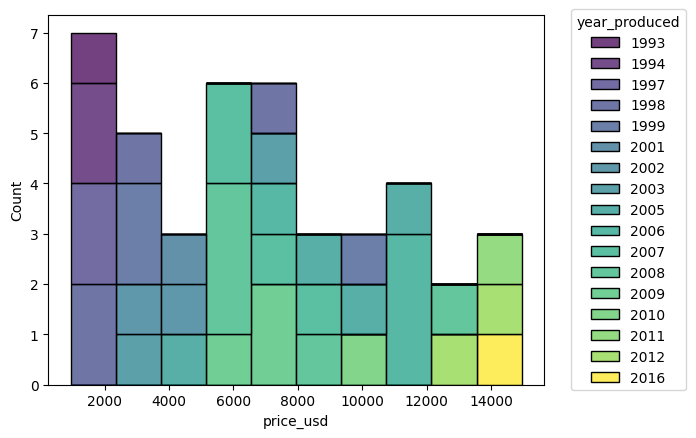

In [41]:
Si_df = df[(df['manufacturer_name']=='Subaru') & (df['model_name']=='Impreza')]
ax =sns.histplot(Si_df, x='price_usd', hue='year_produced', multiple='stack', palette='viridis', bins=10)
sns.move_legend(ax, "center right",bbox_to_anchor=(1.3, 0.5))


In [47]:
Si_df.groupby('year_produced').describe()


odometer_value                                           
                       count           mean            std       min   
year_produced                                                          
1993                     1.0  340000.000000            NaN  340000.0  \
1994                     2.0  365750.000000    3181.980515  363500.0   
1997                     2.0  309786.000000   42123.765169  280000.0   
1998                     4.0  323514.000000  118828.192996  180000.0   
1999                     3.0  182000.000000  152354.848955   10000.0   
2001                     1.0  329786.000000            NaN  329786.0   
2002                     2.0  226841.000000   88870.594473  164000.0   
2003                     2.0  258500.000000   40305.086528  230000.0   
2005                     4.0  164500.000000   51312.766443   97000.0   
2006                     4.0  206500.000000   45793.012567  172000.0   
2007                     4.0  195101.000000   60061.264311  138404.0   
2008                     5.0  197688.200000   43980.320192  130000.0   
2009                     3.0  131423.333333   68106.957305   58270.0   
2010                     1.0  142000.000000            NaN  142000.0   
2011                     1.0  118000.000000            NaN  118000.0   
2012                     2.0   96500.000000    2121.320344   95000.0   
2016                     1.0   80000.000000            NaN   80000.0   

                                                      engine_capacity   
                    25%       50%       75%       max           count   
year_produced                                                           
1993           340000.0  340000.0  340000.0  340000.0             1.0  \
1994           364625.0  365750.0  366875.0  368000.0             2.0   
1997           294893.0  309786.0  324679.0  339572.0             2.0   
1998           266250.0  324528.0  381792.0  465000.0             4.0   
1999           123000.0  236000.0  268000.0  300000.0             3.0   
2001           329786.0  329786.0  329786.0  329786.0             1.0   
2002           195420.5  226841.0  258261.5  289682.0             2.0   
2003           244250.0  258500.0  272750.0  287000.0             2.0   
2005           140500.0  173000.0  197000.0  215000.0             4.0   
2006           185500.0  190000.0  211000.0  274000.0             4.0   
2007           169601.0  181000.0  206500.0  280000.0             4.0   
2008           185000.0  205328.0  222000.0  246113.0             5.0   
2009           100635.0  143000.0  168000.0  193000.0             3.0   
2010           142000.0  142000.0  142000.0  142000.0             1.0   
2011           118000.0  118000.0  118000.0  118000.0             1.0   
2012            95750.0   96500.0   97250.0   98000.0             2.0   
2016            80000.0   80000.0   80000.0   80000.0             1.0   

                         ... up_counter        duration_listed               
                   mean  ...        75%    max           count        mean   
year_produced            ...                                                 
1993           1.600000  ...       5.00    5.0             1.0   91.000000  \
1994           1.800000  ...      80.75  107.0             2.0  235.500000   
1997           2.100000  ...      14.50   19.0             2.0   70.000000   
1998           2.050000  ...       9.00   15.0             4.0   61.000000   
1999           2.333333  ...      72.50  103.0             3.0  229.666667   
2001           1.600000  ...      27.00   27.0             1.0   60.000000   
2002           2.250000  ...      27.50   36.0             2.0  128.000000   
2003           2.000000  ...       4.00    5.0             2.0   46.500000   
2005           2.000000  ...      22.50   36.0             4.0  182.000000   
2006           2.125000  ...      17.00   62.0             4.0  151.750000   
2007           2.000000  ...      44.25   54.0             4.0  147.750000   
2008           2.000